# Лабораторная работа 4
# Правильный многоугольник Рело. Векторизация вычислений в `numpy`

Немчинович Виктория Дмитриевна, 29.03.2025

## Задание 4.1. Построение треугольника Рело

Постройте представоение границы правильного треугольника Рело в виде матрицы,
каждая строка которой содержит координаты точек, описывающих границу.


Полагаем, что заданы координаты центра правильного треугольника Рело center ,
ширина треугольника Рело r и количество точек для описания одной стороны
треугольника Рело N .

## Выполнение задания 4.1

Подключим модули

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

Определим переменные

In [4]:
n = 3 # количество вершин треугольника Рело
center = np.array([0,0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания одной стороны треугольника Рело

### Этап 1. Вычисление координат вершин правильного треугольника

Вершины правильного многоугольника расположены на окружности, описанной вокруг многоугольника. Радиус `R` окружности, описанной вокруг правильного *n*-угольника с длиной стороны , вычисляется по формуле</br>
$$R=\frac{l}{2sin\pi/n} $$
Длина стороны *l* правильного треугольника, на котором будем строить треугольник Рело, совпадает с шириной треугольника Рело

In [5]:
l = r # !!! равенство справедливо только для треугольника Рело

Вычислим радиус описанной окружности $R$

In [6]:
R = l/(2*np.sin(np.pi/n))

Зафиксируем прямоугольную декартову систему координат. Центр треугольника размещаем в точке `center` . Построим матрицу `vertices` с координатами вершин правильного треугольника, используя параметрическое описание точек описанной окружности по формуле $x(t)=x_{\text{0}}+Rcos(t), y(t)=y_{\text{0}}+Rsin(t) $, для значений $t \in {0,2\pi/3,4\pi/3} $.

In [7]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
vertices

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

Массив `vertices` вычислен без использования циклов. Это
пример векторизации вычислений в numpy.

Для доступа к элементам матрицы в `numpy` можно использовать индексацию с
двумя индексами

In [8]:
vertices[0,0], vertices[0,:], vertices[:,1]

(np.float64(5.773502691896258),
 array([5.77350269, 0.        ]),
 array([ 0.,  5., -5.]))

Построим изображение вершин треугольника

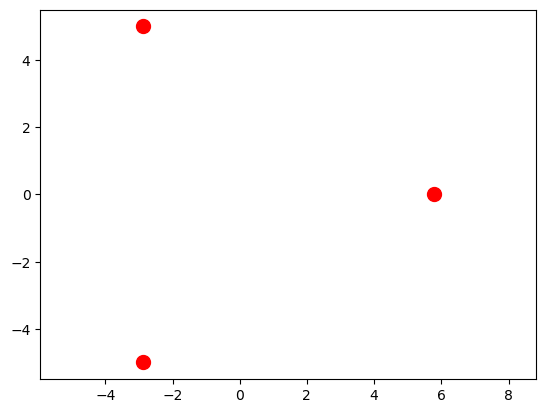

In [9]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

### Этап 2. Представление одной стороны треугольника Рело

Обозначим через $\alpha$ центральный угол, соответствующий стороне правильного n-угольника. Тогда
$$ \alpha=2\pi/n$$

Обозначим через $\beta$ центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника. Тогда $$ \beta=\alpha/2 $$

Вычислим значения введенных величин $\alpha$ и $\beta$ 

In [10]:
alpha = 2*np.pi/n
beta = alpha/2

Вычислим массив `angle` значений угла для построения координат точек стороны треугольника Рело, состоящий из `N` элементов

In [11]:
angle = np.linspace(-beta/2, beta/2, N)

Вычислим матрицу `side0` с координатами точек первой стороны треугольника Рело, используя параметрическое описание окружности с центром в точке `vertices[0]`, радиусом `r` для значений угла на отрезке $[\pi - \beta / 2, \pi + \beta / 2]$

In [12]:
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi), np.sin(angle + np.pi)])

Массив `side0` вычислен без использования циклов. Это
пример векторизации вычислений в `numpy`.

Построим изображение вершин и стороны треугольника Рело

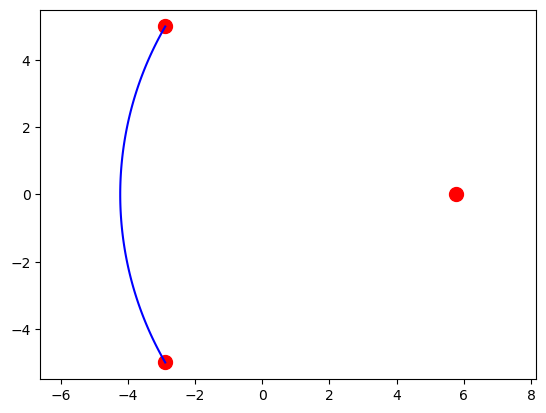

In [13]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

Вычислим матрицу `side1` с координатами точек, описывающих сторону треугольника Рело относительно второй вершины `vertices[1]`. Сторона представляет собой дугу окружности радиуса $r$ с центром в точке `vertices[1]` и значением угла $[\pi - \beta / 2 + \alpha, \pi + \beta / 2 + \alpha]$


In [14]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha),np.sin(angle + np.pi + alpha)])

Построим изображение вершин и двух сторон треугольника Рело

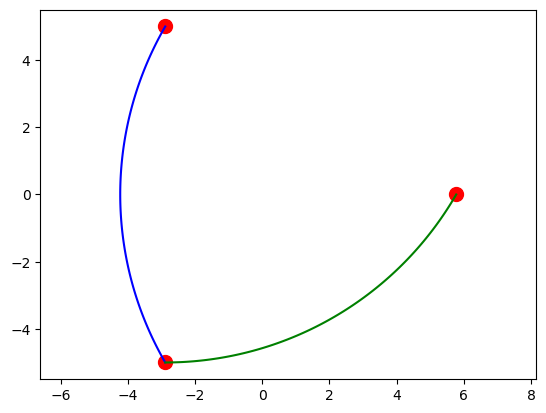

In [15]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

### Этап 3. Моделирование границы треугольника Рело

Создадим СПИСОК из матриц, каждая их которых содержит координаты точек одной из сторон треугольника Рело

In [16]:
list_sides = [vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)]

С помощью фунции `concatenate` из расширения `numpy` объединим массивы,
созданные для каждой из сторон треугольника Рело, в единый массив `sides`

In [17]:
sides = np.concatenate(list_sides)

Построим изображение вершин и всех сторон треугольника Рело

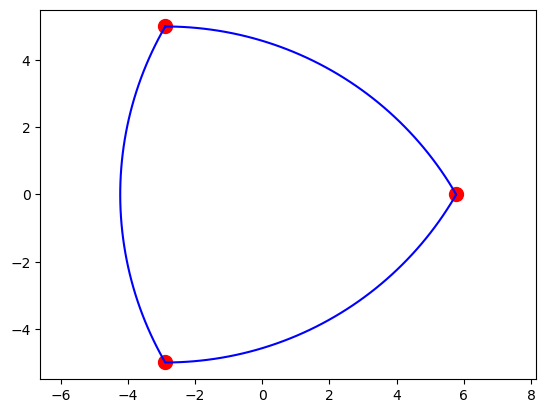

In [18]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');

## Задание 4.2. Построение правильного многоугольника Рело

$\color{red}{Создайте}$  матричное описание границы правильного многоугольника Рело для
произвольных значений переменных `n`, `center`, `r`, `N`, следуя аналогичным
рассуждениям из Задания 4.1 (вычисление координат вершин, представление одной
стороны, моделирование всей границы). Помните, что количество вершин
многоугольника должно быть нечетным.


Обратите внимание, что длина стороны $l$ правильного многоугольника, на
основании которого строится многоугольник Рело, является неизвестной величиной
и должна быть выражена через количество вершин $n$ и ширину $r$ многоугольника
Рело. $\color{red}{Напишите}$  подробно, как получена аналитическая зависимость $l$ от $n$ и $r$.
Объяснения оформите в тексте документа с лабораторной работой.

Вывод стороны многоугольника Рело через количество сторон и ширину удобнее выполнять для многоугольника Рело, у которого количество сторон больше чем 3, так как в этом случае ширина $\rm{r}$ совпадает с длиной стороны $\rm{l}$. Я выбрала для вывода формулы правильный пятиугольник Рело.

Рассмотрим треугольник, который получился в результате соединения двух несоседних вершин прямой. Эта прямая будет шириной многоугольника, а полученный треугольник - равнобедренным, так как боковые стороны равняются ширине пятиугольника.

Рассмотрим центральный угол $\alpha$, соответствующий стороне правильногo n-угольника и центральный угол $\beta$, соответствующий стороне правильного многоугольника Рело. При учёте, что вокруг правильного пятиугольника можно описать окружность, то в нашем случае угол $\alpha$ - центральный угол, угол $\beta$ - вписанный угол. Оба этих угла опираются на одну и ту же сторону пятиугольника. Как и сказано в условии $\beta$ = $\alpha$/2 (по теореме о вписанных углах).

Рассмотрим прямоугольный трегольник, полученный через в результате опускания высоты в равнобедренном треугольнике, в котором боковые стороны - это ширины пятиугольника.
Из определения синуса в прямоугольном треугольнике: $$\sin{\frac{\beta}{2}} = \frac{\frac{\rm{l}}{2}}{\rm{r}}$$

Выражаем $\rm{l}$:
$$\rm{l} = 2*\rm{r}*\sin{\frac{\beta}{2}} = 2*\rm{r}*\sin{\frac{\alpha/2}{2}} = 2*\rm{r}*\sin{\frac{\pi}{2n}}$$

In [19]:
n = 5
center = np.array([0, 0])
r = 4.
N = 50

In [20]:
    alpha = 2*math.pi/n
    beta = alpha/2
    angle = np.linspace(-beta/2, beta/2, N)
    l = 2*r*math.sin(math.pi/(2*n))
    R = l/(2*math.sin(math.pi/n))
    t = np.arange(0,2*np.pi,2*np.pi/n)
    vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
    list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)]
    sides = np.concatenate(list_sides)

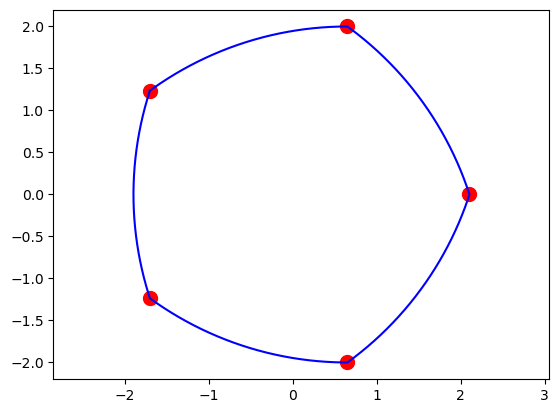

In [21]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');

In [22]:
l = 2*r*math.sin(math.pi/(2*n))

Вычислим радиус $\rm{R}$ описанной окружности

In [23]:
R = l/(2*math.sin(math.pi/n))

Введем прямоугольную декартову систему координат. Построим матрицу с координатами вершин правильного треугольника. Центр треуголника размещаем в точке **center**, радиус описанной окружности полагаем равным $\rm{R}$

In [24]:
t = np.arange(0,2*np.pi,2*np.pi/n) # угловые координаты вершин

vertices = center + R*np.transpose([np.cos(t), np.sin(t)]) 
vertices

array([[ 2.10292445,  0.        ],
       [ 0.64983939,  2.        ],
       [-1.70130162,  1.23606798],
       [-1.70130162, -1.23606798],
       [ 0.64983939, -2.        ]])

In [25]:
np.array([np.cos(t), np.sin(t)]) # матрица перехода

array([[ 1.        ,  0.30901699, -0.80901699, -0.80901699,  0.30901699],
       [ 0.        ,  0.95105652,  0.58778525, -0.58778525, -0.95105652]])

In [26]:
R * np.transpose([np.cos(t), np.sin(t)]) # координаты вершин без учета смещения по центру фигуры

array([[ 2.10292445,  0.        ],
       [ 0.64983939,  2.        ],
       [-1.70130162,  1.23606798],
       [-1.70130162, -1.23606798],
       [ 0.64983939, -2.        ]])

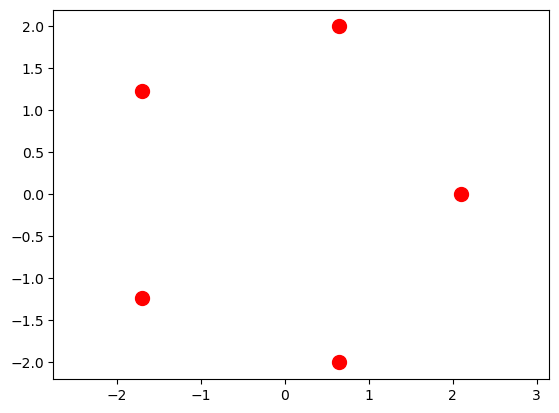

In [27]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

In [28]:
alpha = 2*math.pi/n # центральный угол правильного n-угольника
beta = alpha/2 # центральный угол правильного n-угольника Рело

Введем вспомогательную последовательность значений угла для построения координат точек стороны многоугольника Рело

In [29]:
angle = np.linspace(-beta/2, beta/2, N) # np.linspace - функция, которая строит последовательность элементов. Вход: начало отсчета, конец отсчета, количество элементов последовательности. Шаг последвательности выбирается автоматически, чтобы был одинаковым.
angle;

Строим матрицу с координатами точек первой стороны

In [30]:
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi), np.sin(angle + np.pi)])

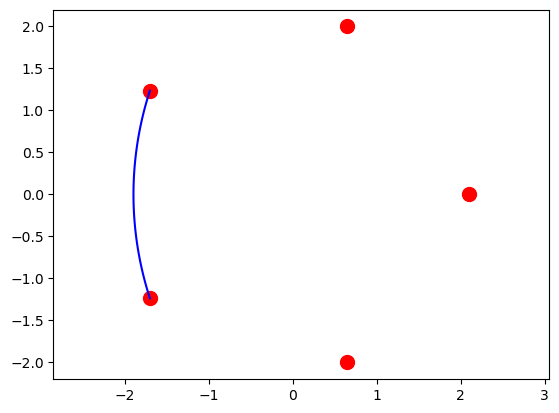

In [31]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

Построим матрицу с координатами точек, описывающих сторону многоугольника Рело относительно вершины vertices[1]. Сторона представляет собой дугу окружности радиуса $\rm{r}$ с центром в точке vertices[1] и значением угла     
[$\pi$ + $\alpha$ - $\beta$ / 2, $\pi$ + $\alpha$ + $\beta$ / 2]

In [32]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha), np.sin(angle + np.pi + alpha)])

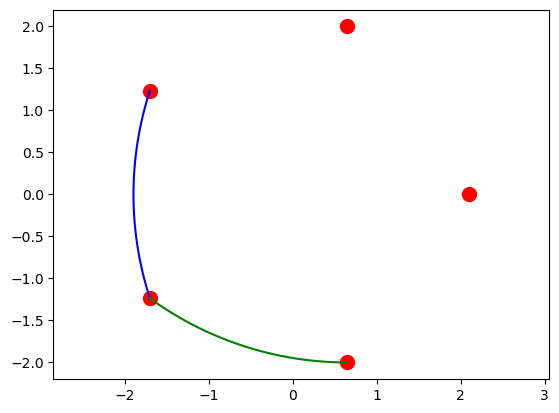

In [33]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

In [34]:
side2 = vertices[2] + r*np.transpose([np.cos(angle + np.pi + 2* alpha), np.sin(angle + np.pi + 2* alpha)])

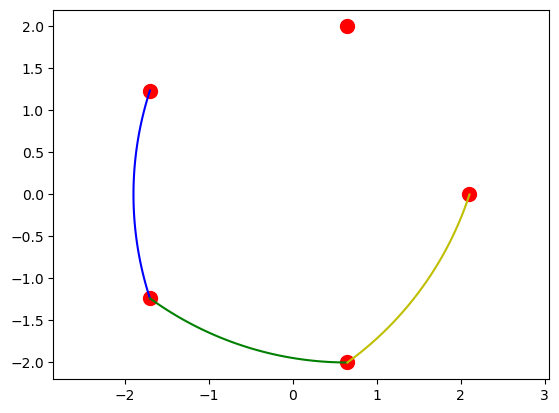

In [35]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.plot(side2[:,0],side2[:,1],'y-',markersize=20)
plt.axis('equal');

In [36]:
side3 = vertices[3] + r*np.transpose([np.cos(angle + np.pi + 3* alpha), np.sin(angle + np.pi + 3* alpha)])

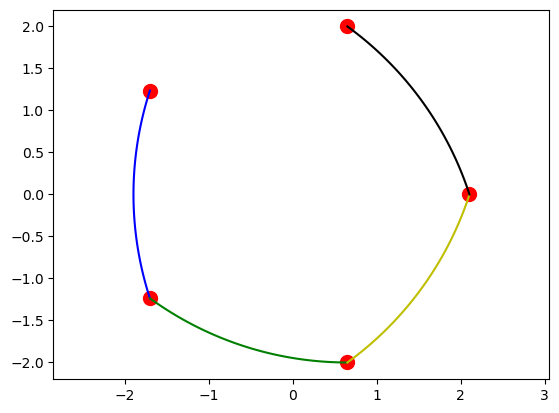

In [37]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.plot(side2[:,0],side2[:,1],'y-',markersize=20)
plt.plot(side3[:,0],side3[:,1],'k-',markersize=20)
plt.axis('equal');

Создадим список из матриц, каждая их которых содержит координаты точек одной из сторон многоугольника Рело


In [38]:
list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)]

С помощью фунции concatenate из расширения numpy объединим массивы для каждой из сторон в единый массив sides

In [39]:
sides = np.concatenate(list_sides)

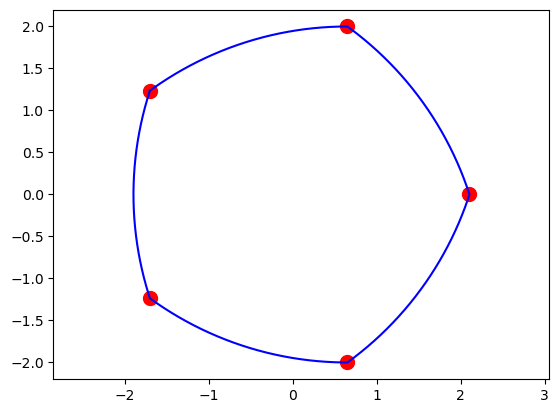

In [40]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');

## Задание 4.3. Результирующая пользовательская функция

In [47]:
def regular_polygon_Relo(n = 3, center = np.array([0,0]), r = 1, N = 100):
    assert r > 0, 'radius r should be positive'
    assert type(N) == int and N >0, 'number of points to represent a side must have type integer'
    assert type(n) == int and n > 2 and n % 2 == 1, ' number of vertices must be odd, more than 2 and must have type integer'
    alpha = 2*math.pi/n 
    beta = alpha/2
    angle = np.linspace(-beta/2, beta/2, N)
    l = 2*r*math.sin(math.pi/(2*n))
    R = l/(2*math.sin(math.pi/n))
    t = np.arange(0,2*np.pi,2*np.pi/n)
    vertices = center + R*np.transpose([np.cos(t), np.sin(t)]) 
    list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)]
    sides = np.concatenate(list_sides)
    return sides, vertices

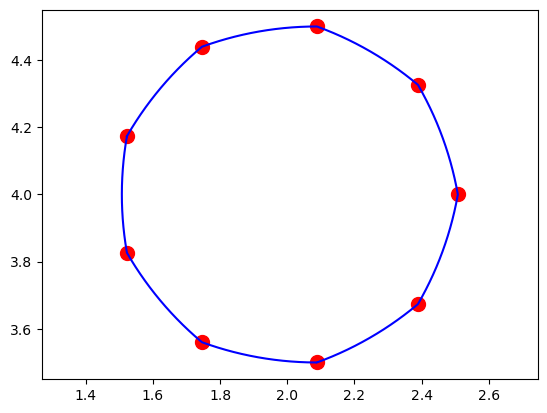

In [42]:
pic = regular_polygon_Relo(n = 9, center = np.array([2, 4]))

plt.plot(pic[1][:,0], pic[1][:,1],'r.',markersize=20)
plt.plot(pic[0][:,0], pic[0][:,1],'b-',markersize=20)
plt.axis('equal');

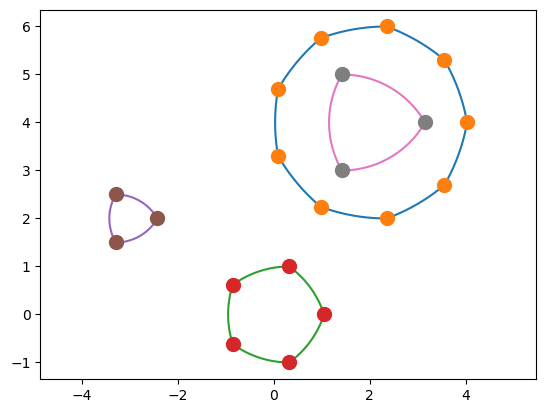

In [43]:
plt.figure()
pic1 =  regular_polygon_Relo(n = 9, center = np.array([2, 4]), r = 4)
pic2 =  regular_polygon_Relo(n = 5, r = 2)
pic3 =  regular_polygon_Relo(n = 3, center = np.array([-3, 2]))
pic4 = regular_polygon_Relo(n = 3, center = np.array([2, 4]), r = 2)
plt.plot(pic1[0][:,0], pic1[0][:,1])
plt.plot(pic1[1][:,0], pic1[1][:,1], '.', markersize=20)

plt.plot(pic2[0][:,0], pic2[0][:,1])
plt.plot(pic2[1][:,0], pic2[1][:,1], '.', markersize=20)

plt.plot(pic3[0][:,0], pic3[0][:,1])
plt.plot(pic3[1][:,0], pic3[1][:,1], '.', markersize=20)

plt.plot(pic4[0][:,0], pic4[0][:,1])
plt.plot(pic4[1][:,0], pic4[1][:,1], '.', markersize=20)
plt.axis('equal');

In [44]:
P3 =  regular_polygon_Relo(r = 2, N = 3)

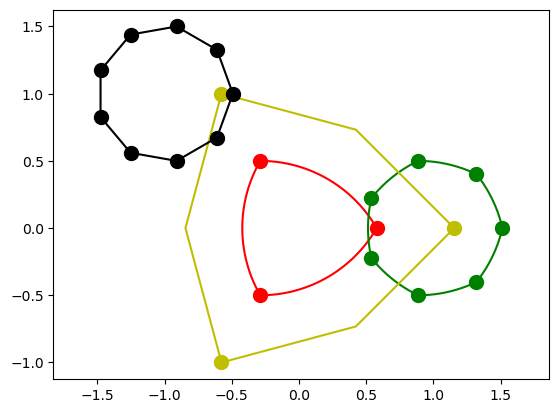

In [45]:
plt.figure()
P1 =  regular_polygon_Relo()
P2 =  regular_polygon_Relo(7, np.array([1, 0])) 
P3 =  regular_polygon_Relo(N = 3, r = 2)
P4 = regular_polygon_Relo(9, np.array([-1, 1]), N = 2)

plt.plot(P1[0][:,0], P1[0][:,1], 'r')
plt.plot(P1[1][:,0], P1[1][:,1], 'r.', markersize=20)

plt.plot(P2[0][:,0], P2[0][:,1], 'g')
plt.plot(P2[1][:,0], P2[1][:,1], 'g.', markersize=20)

plt.plot(P3[0][:,0], P3[0][:,1], 'y')
plt.plot(P3[1][:,0], P3[1][:,1], 'y.', markersize=20)

plt.plot(P4[0][:,0], P4[0][:,1],'k')
plt.plot(P4[1][:,0], P4[1][:,1], 'k.', markersize=20)
plt.axis('equal');